**A car sales agency employes inspectors to check any car that come in for being sold to determine the price at which it can be sold. This involves finding all the attributes and features of the car and based on the instructor's past experiences, assign a sale price value. The agency wants to automate this process using the histroical tracsections(records) it has. This model should be able to predict an estimated price for a car given it's features.**

### linear regression steps
- Exploratory data analysis
- Data pre-processing
- Model creation
- Model performance
- Model optimization
- predictions

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis and Pre-processing Steps
## Basic Statistical understanding of the data
1. Import data using the pandas library
2. Understanding th structure of data 

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data Pre-processing steps

In [8]:
# spliting company name from car name

CompanyName = cars["CarName"].apply(lambda x: x.split(' ')[0]) # [0] denotes taking first part after spliting the name.
cars.insert(3, "CompanyName", CompanyName) # inserting CompanyName column at index position 3
cars.drop(["CarName"], axis=1, inplace=True) # droping CarName column from the dataset
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
cars.drop(['car_ID'],axis=1, inplace=True)
cars.columns

Index(['symboling', 'CompanyName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [10]:
# checking (unique) barnd names and fixing it.
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### fixing invalid values / spelling mistakes 
- maxda -> mazda
- Nissan -> nissan
- porsche -> porcshce
- toyota -> toyouta
- vokswagen -> volkswagen

In [11]:
cars.CompanyName = cars.CompanyName.str.lower()

cars.CompanyName.replace("maxda","mazda",inplace=True)
cars.CompanyName.replace("Nissan","nissan",inplace=True)
cars.CompanyName.replace("porsche","porcshce",inplace=True)
cars.CompanyName.replace("toyota","toyouta",inplace=True)
cars.CompanyName.replace("vokswagen","volkswagen",inplace=True)
# we can also do this process by making a function which takes 2 inputs.

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyouta', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
# checking the duplicates

cars.loc[cars.duplicated()]
# print(cars.duplicated()) # false if their is no duplicate in column, else return true. (for all columns individually)

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


## Ananysis Visualization
### Distributions

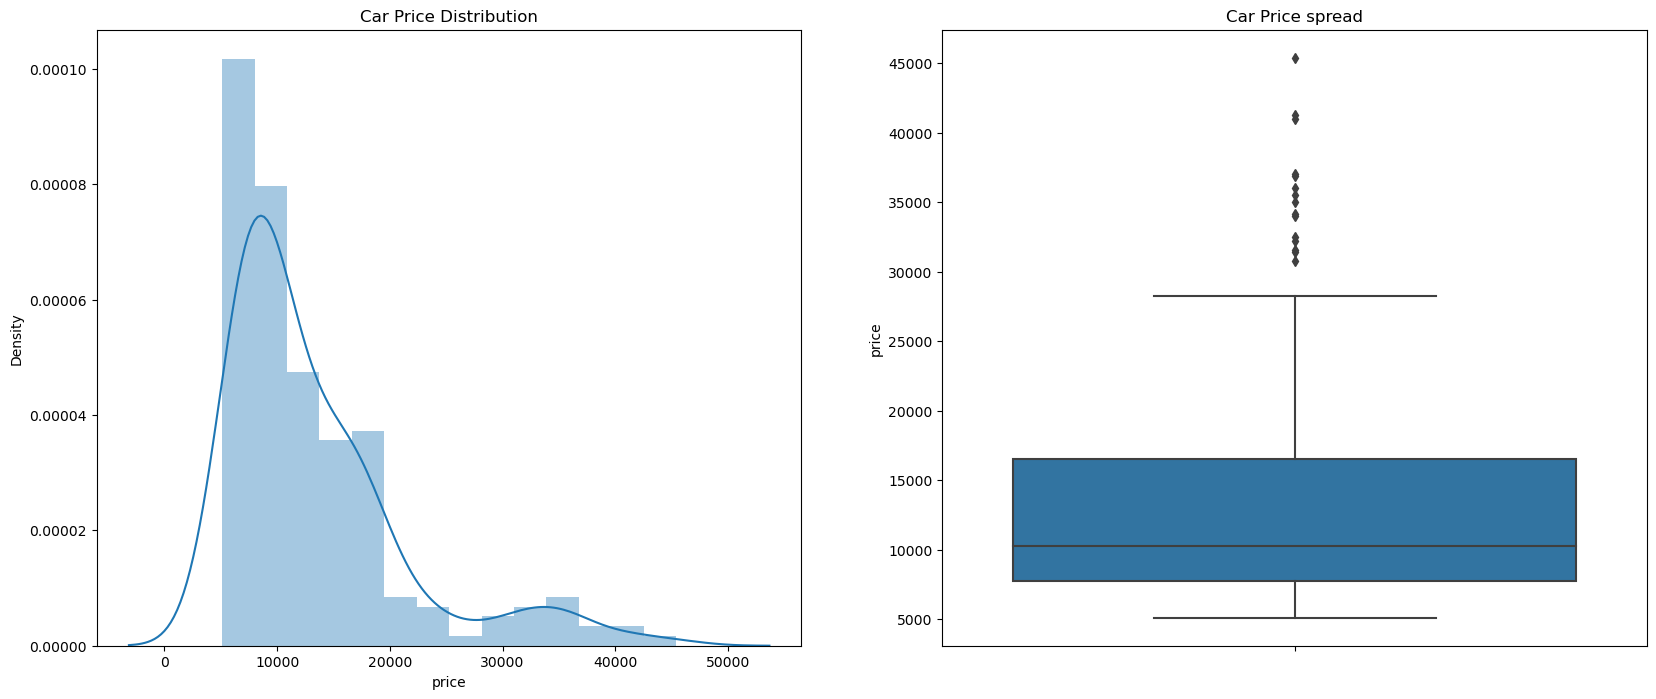

In [13]:
# univariate analysis / univariate explorator data analysis

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price spread")
sns.boxplot(y=cars.price)

plt.show()

In [14]:
print(cars.price.describe(percentiles=[0,0.25,0.5,0.75,0.85,0.90,1.0]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
0%        5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


### Obeservations:
1. Most of th e prices is concentrate around 10000 - 15000 range
2. There is a significant differance between thr mean and the median of the price distribution
3. The data points are far spread out from the mean, while indicating a high variance in the car price(85% of the price are below 18500, whereas the remaining 15% are between 18500 and 45000. (Positive/Right side Skewness)

### Visualizing the catagorical data
the following the the catagorical variables in the dataset:
- CompanyName
- symboling
- fuletype
- engninetype
- carbody
- doornumber
- enginelocation
- fulesystem
- cylindernumber
- aspiration
- drive wheel

### Determine the number of cars per - company, fuletype, cartype

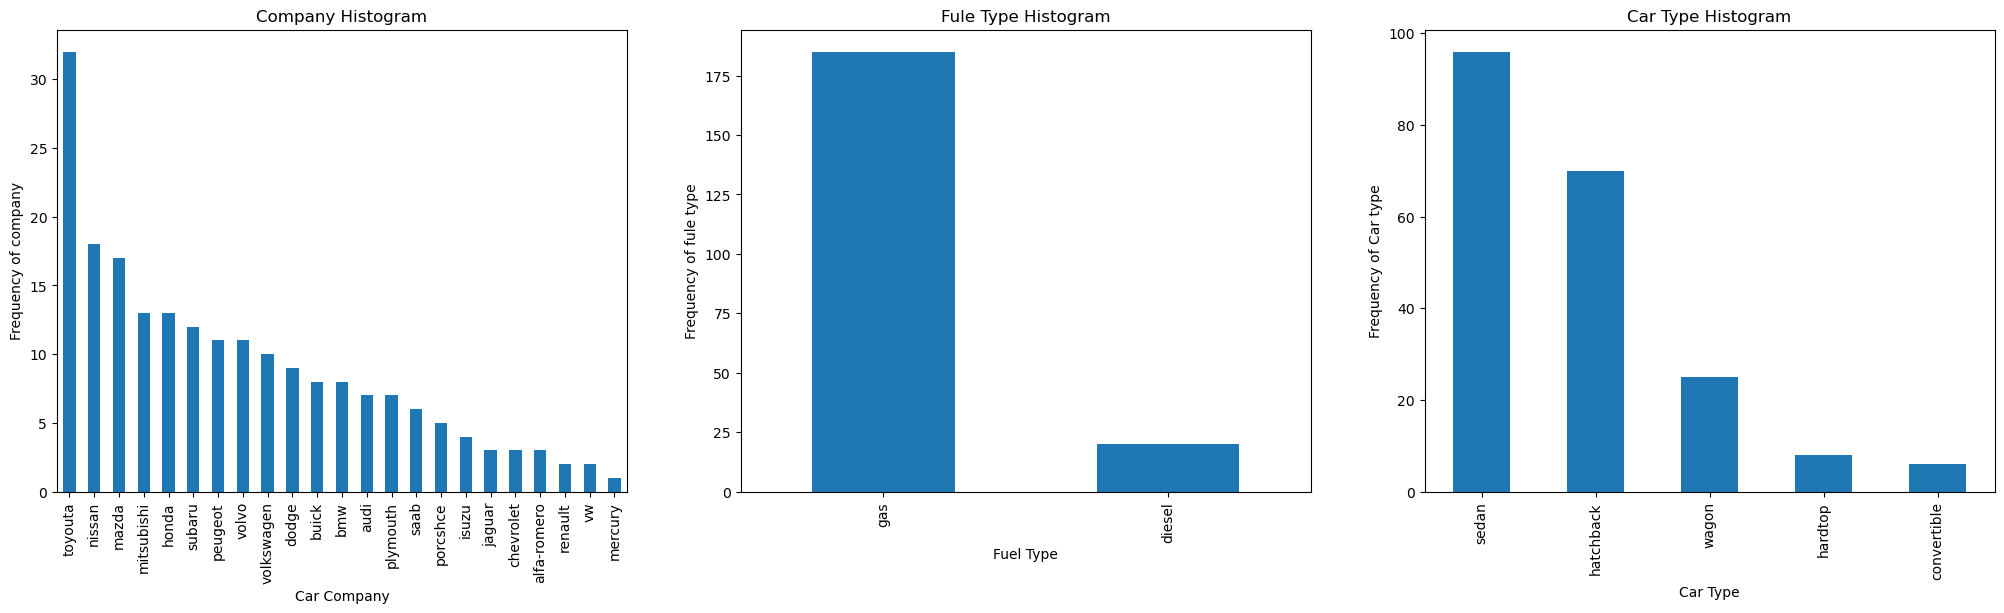

In [15]:
plt.figure(figsize = (25,6))

# way1
plt.subplot(1,3,1)
plt.title("Company Histogram")
plt.xlabel("Car Company")
plt.ylabel("Frequency of company")
cars.CompanyName.value_counts().plot(kind="bar")

#way2
plt.subplot(1,3,2)
plt.title("Fule Type Histogram")
plt2 = cars.fueltype.value_counts().plot(kind="bar")
plt2.set(xlabel="Fuel Type", ylabel="Frequency of fule type")

plt.subplot(1,3,3)
plt.title("Car Type Histogram")
plt3 = cars.carbody.value_counts().plot(kind ="bar")
plt3.set(xlabel="Car Type", ylabel="Frequency of Car type")

plt.show()

### Observations/Inference:
1. Toyouta seems to be favoured car campany.
2. Number of gas fuel cars are more than diseal.
3. sedan is the top car preferred.

### Determinie Count/Frequency and Distribution/spread of price value per Symboling catogary

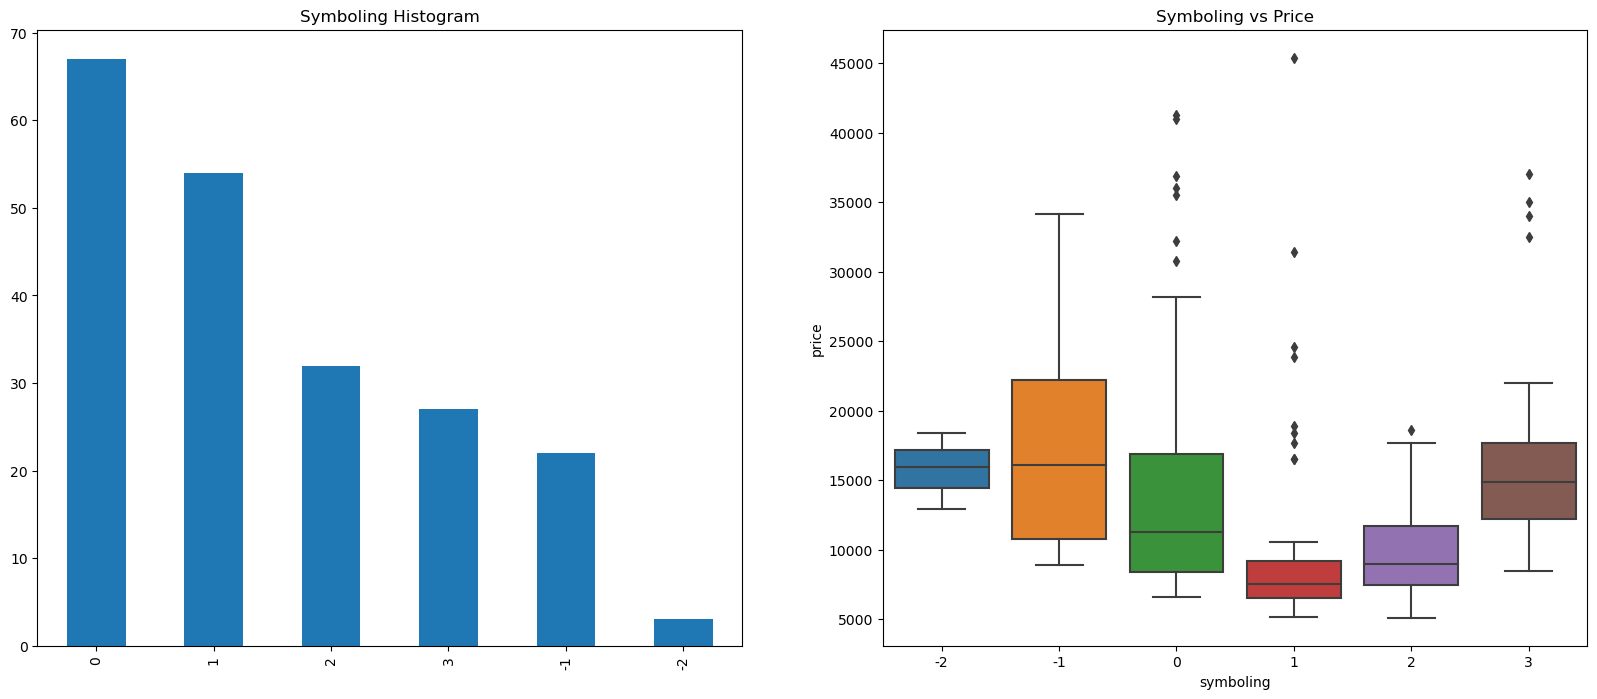

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Symboling Histogram")
cars.symboling.value_counts().plot(kind='bar')

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x=cars.symboling, y=cars.price)

plt.show()

### Observation/Inferance:
1. It seems that the symboling with 1 and 0 have the higest number of rows
2. The car with -1 symboling seems to be high prices(as it makes seems too, insurance risk rating -1 ia quite good)
3. It seems that symboling with 3 value has the price range similar to -2. 
4. There is a dip in price at symboling 1.

### Determine count/frequency and distribution/spread of price value per engine type

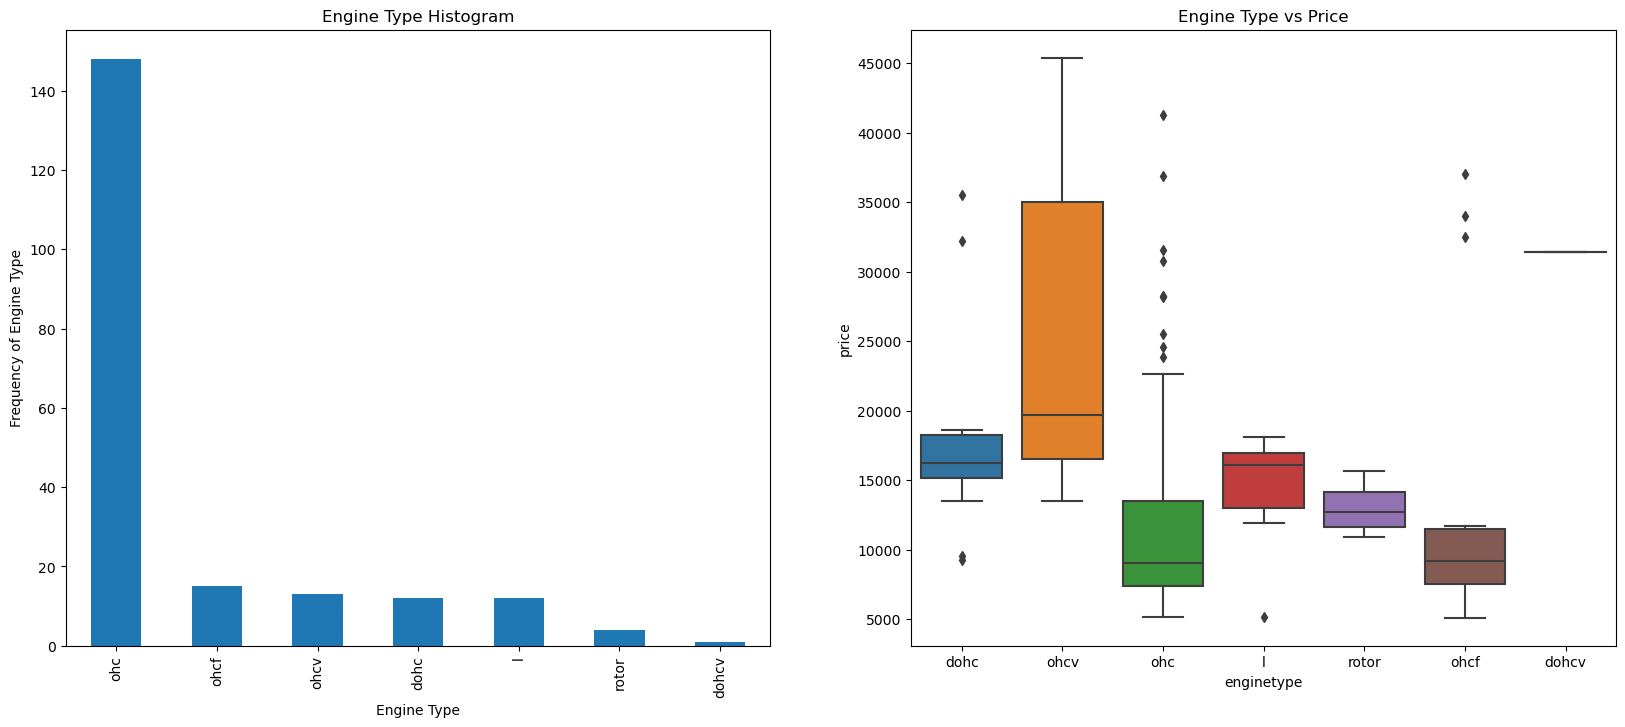

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Engine Type Histogram")
plt1 = cars.enginetype.value_counts().plot(kind="bar")
plt1.set(xlabel="Engine Type", ylabel="Frequency of Engine Type")

plt.subplot(1,2,2)
plt.title("Engine Type vs Price")
sns.boxplot(x=cars.enginetype, y=cars.price)
plt.show()

### Observation:
1. ohc engine type cars have the higest sells as it is cheaper.
2. also ohcf is cheaper but less sells.
3. ohcv engine type have less sells but have higher price value then the others.
4. ohcv and l have alsome same price range

### Determining average price per engine type

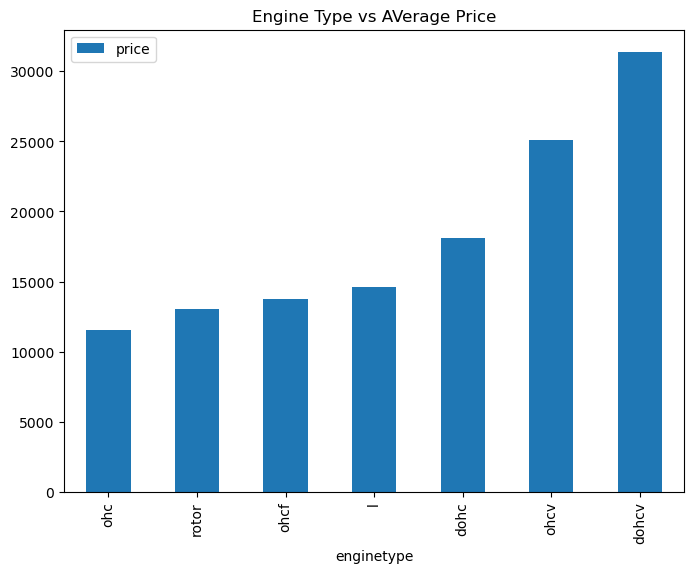

In [18]:
df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values())
df.plot.bar(figsize=(8,6))
plt.title("Engine Type vs AVerage Price")
plt.show()

### Inferance:
1. ohc engine seems to be most favourate
2. ohcv have the higest price range(while dohcv has only one row).

### Determine average car price per company, fueltype, cartype

<Figure size 1000x300 with 0 Axes>

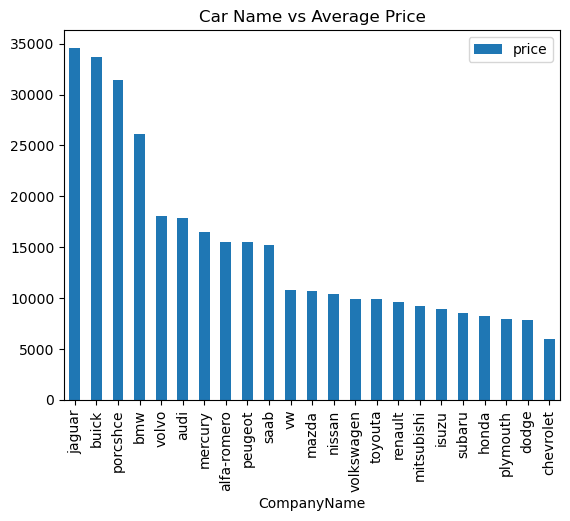

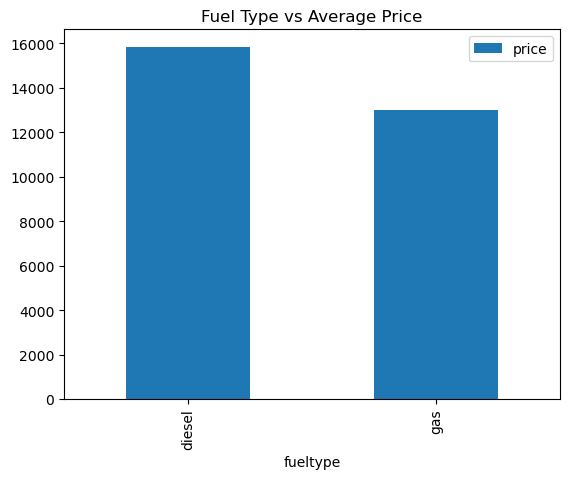

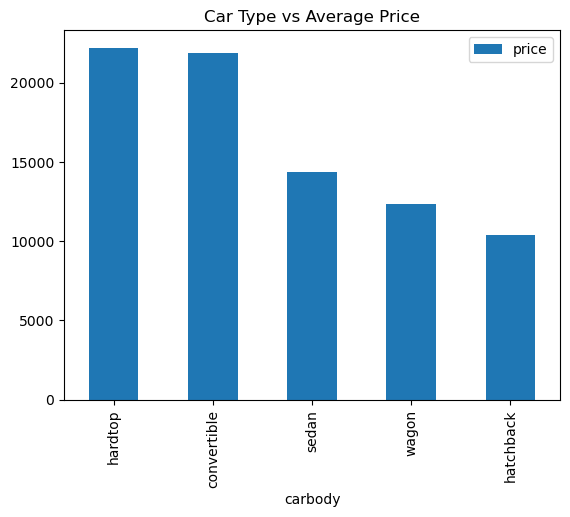

In [19]:
plt.figure(figsize=(10,3))

df = pd.DataFrame(cars.groupby(["CompanyName"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car Name vs Average Price")

df = pd.DataFrame(cars.groupby(["fueltype"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Fuel Type vs Average Price")

df = pd.DataFrame(cars.groupby(["carbody"])["price"].mean().sort_values(ascending=False))
df.plot.bar()
plt.title("Car Type vs Average Price")

plt.show()

### Observations:
1. Jaguar and Buick seems to have higest average price
2. Diseal cars have higher average price than Gas.
3. Hardtop and Convertible have higher average price.

### For Aspiration and Door Number, Count and Price Distribution

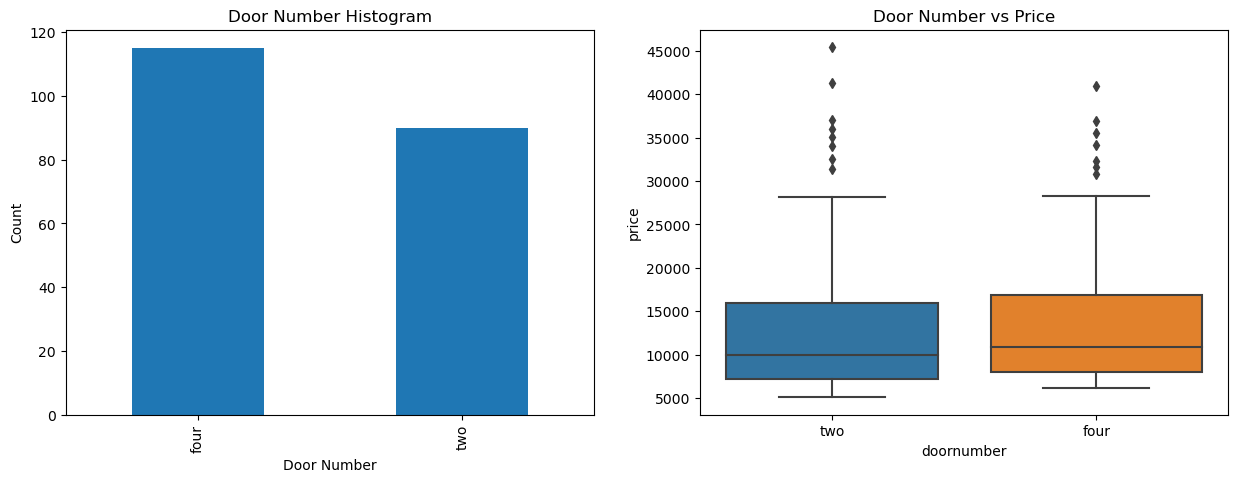

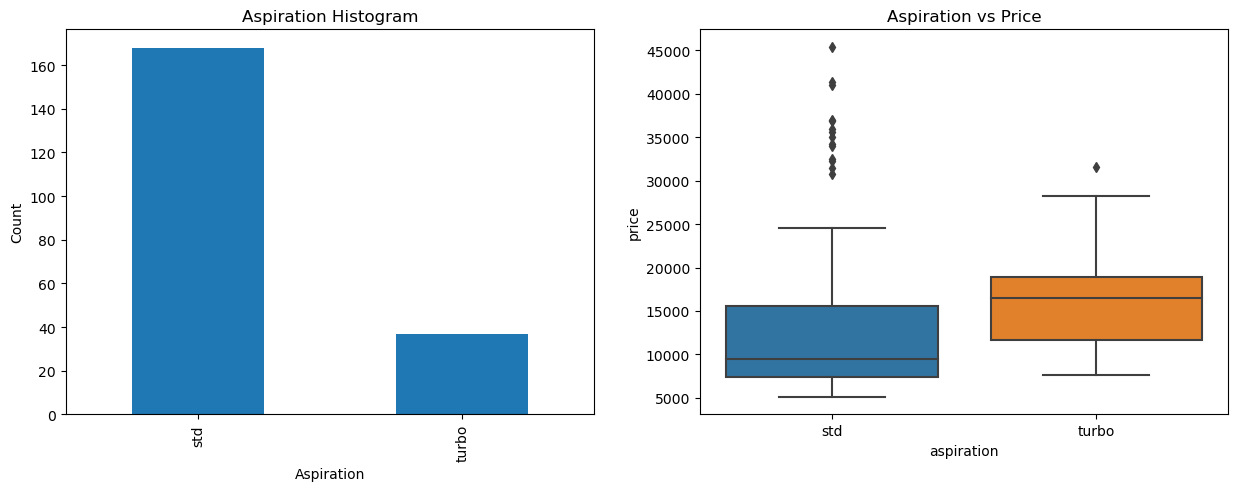

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Door Number Histogram")
plt1 = cars.doornumber.value_counts().plot(kind="bar")
plt1.set(xlabel="Door Number", ylabel="Count")

plt.subplot(1,2,2)
plt.title("Door Number vs Price")
sns.boxplot(x=cars.doornumber, y=cars.price)
plt.show()


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
plt1 = cars.aspiration.value_counts().plot(kind="bar")
plt1.set(xlabel="Aspiration", ylabel="Count")

plt.subplot(1,2,2)
plt.title("Aspiration vs Price")
sns.boxplot(x=cars.aspiration, y=cars.price)
plt.show()

### Observation:
1. two door and four door have almost same count and price range
2. aspiration of std is much more as compaired to turbo
3. price range of std and turbo is almost the same

### For EngineLocation, CylinderNumber and Drivewheel, count and price distribution

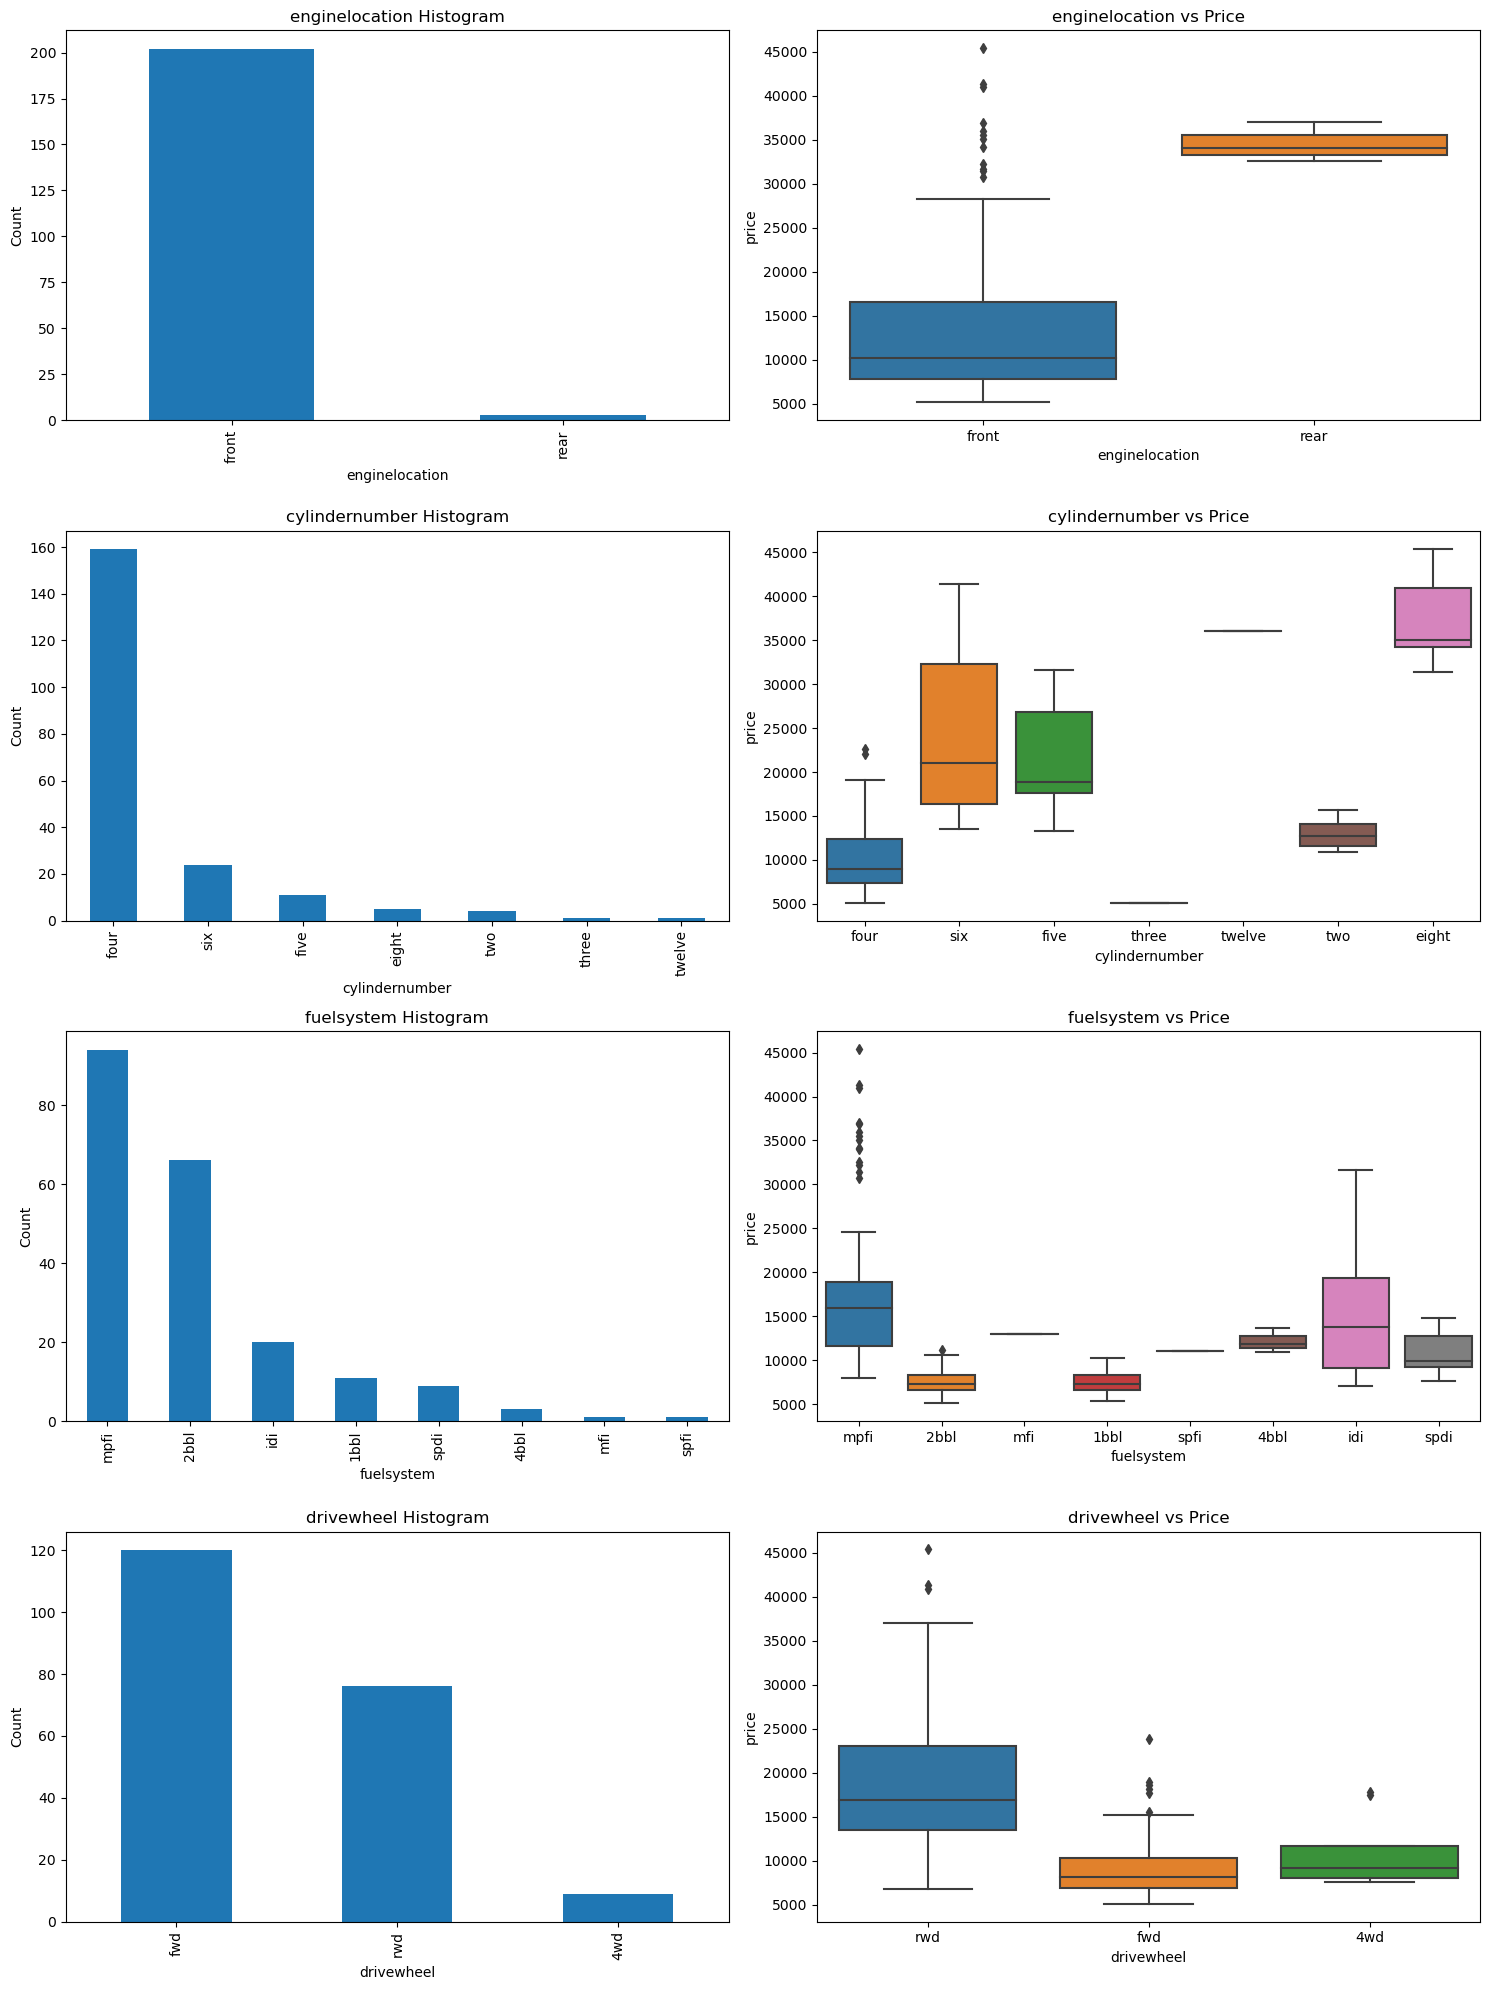

In [21]:
def plot_count(x, fig):
    plt.subplot(4,2,fig)
    plt.title(x+" Histogram")
    plt1 = cars[x].value_counts().plot(kind="bar")
    plt1.set(xlabel=x+"", ylabel="Count")
    
    plt.subplot(4,2,fig+1)
    plt.title(x+" vs Price")
    sns.boxplot(x=cars[x], y=cars.price)

plt.figure(figsize=(15,20))

plot_count('enginelocation',1)
plot_count('cylindernumber',3)
plot_count('fuelsystem',5)
plot_count('drivewheel',7)

plt.tight_layout()

### Observations:
1. very few datapoints for enginelocation categories to make an inferance/observation.
2. most common number of cylinders are four, six, and five. Though eight cylinder have the higest price.
3. mfi and 2bbl are most common type of fule system. mfi and idi having the higest price range. but there are few data for other categories to drive any meaningful inferance
4. a very significant differance in drivewheek catagory. Most high range cars seems to prefer rwd drivewheel.

# Visualising Numerical Data
### finding the correlation between Price and carlength, Carwidth, Carheight, Carweight using Scatterplot

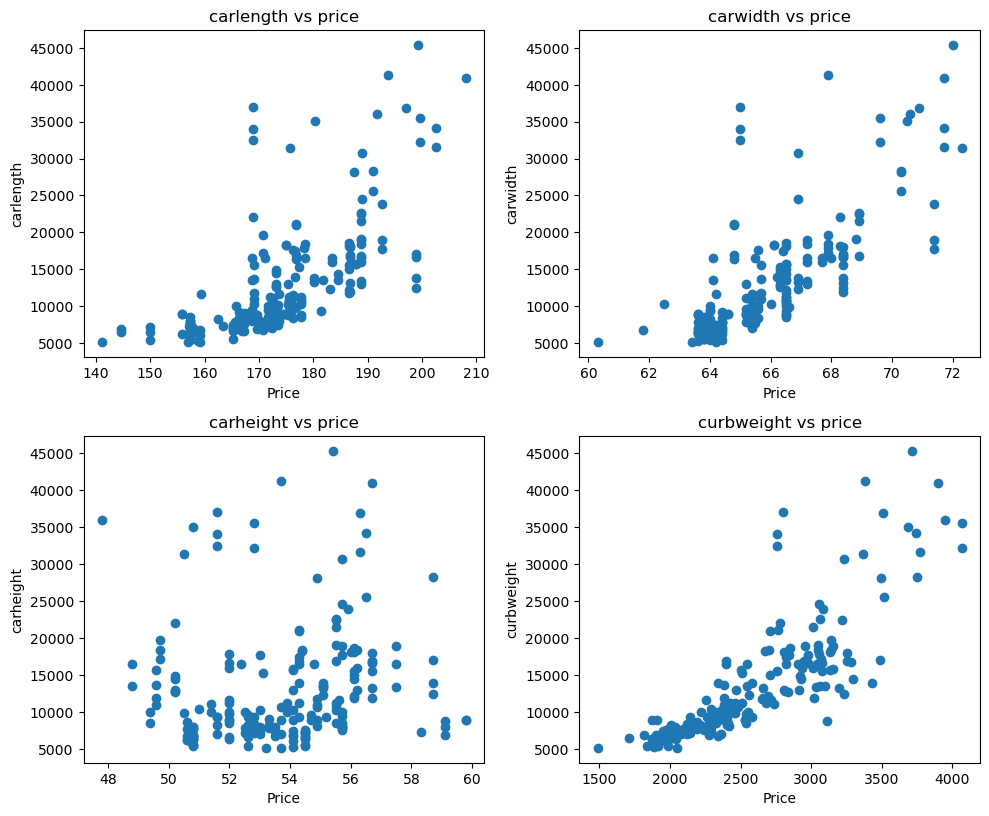

In [22]:
def scatter_plot(x, fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+" vs price")
    plt.xlabel("Price")
    plt.ylabel(x+"")
    
plt.figure(figsize=(10,20))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)

plt.tight_layout()

### Observation:
1. carwidth, carlength, curbweigth seems to have a positive co-relation with price.
2. carheigth dosen't show any sognificant trend with price.


# Feature Engineering


In [23]:
# Fuel Economy = 0.55 x citympg  +  0.45 x highwaympg

cars['fueleconomy'] = ((0.55 * cars['citympg']) + (0.45 * cars['highwaympg']))
cars.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

In [24]:
cars

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.25
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,21.70
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.25
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.45


## Another Bivariate Data analysis
### relationship between fuel economy and price. Third dimension - Drive wheel

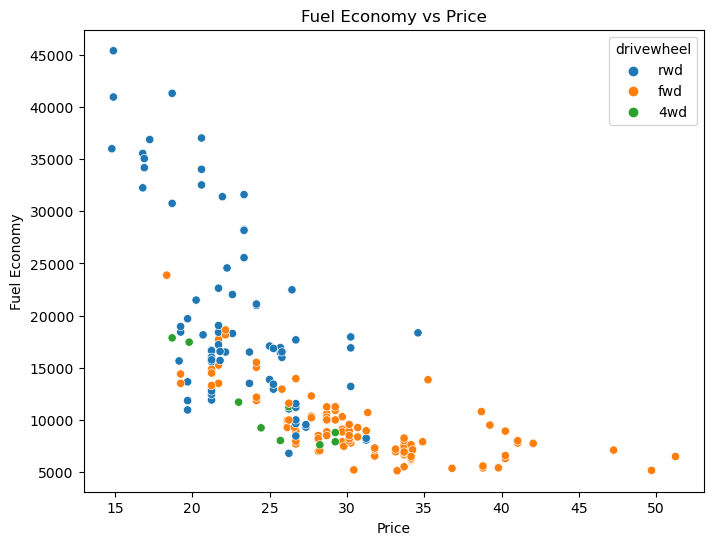

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(8,6))

plt.title("Fuel Economy vs Price")
sns.scatterplot(x=cars.fueleconomy, y=cars.price, hue=cars.drivewheel)
plt.xlabel("Price")
plt.ylabel("Fuel Economy")

plt.show()
plt.tight_layout()

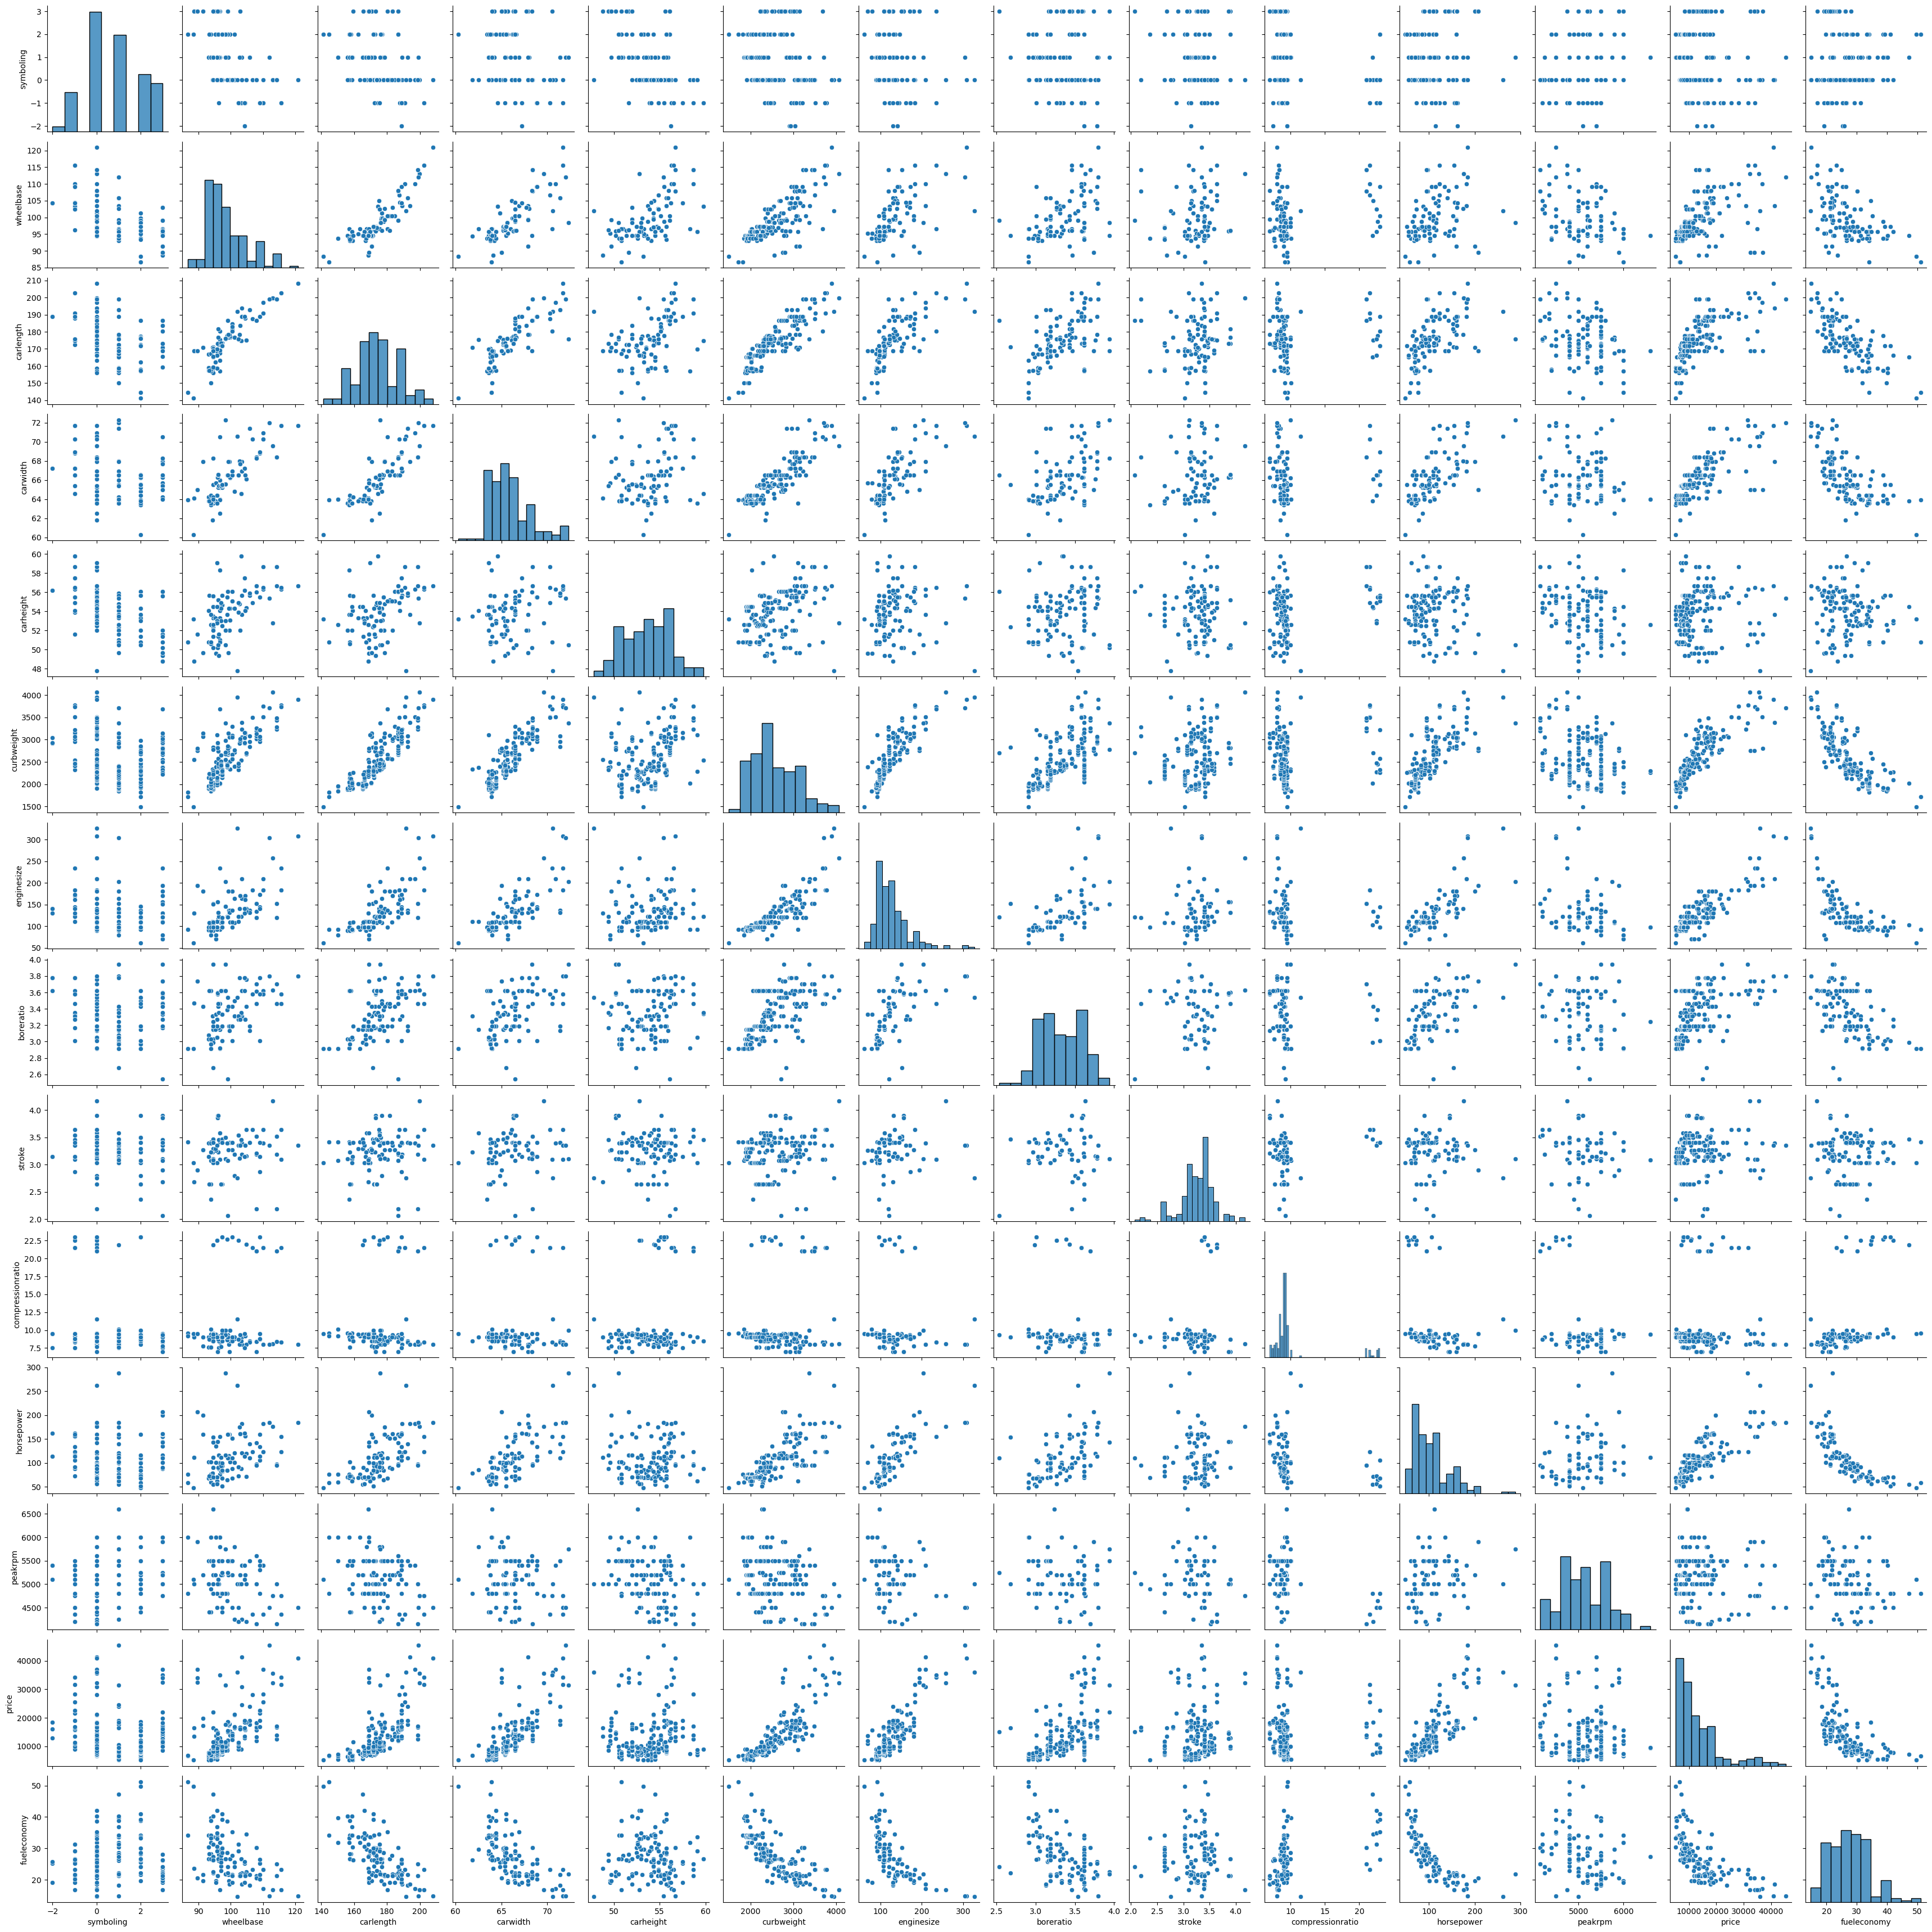

In [27]:
# Pair Plot is a plot in which we have plot scatter plots of all combination.
sns.pairplot(cars)
plt.show()

### Observation:
1. either linear or inverse linear relationship exist in almost all the plots 

## Finding Highly Correlations between Features

In [28]:
cor = cars.corr()
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,fueleconomy
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.079978,-0.003257
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,0.577816,-0.508136
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,0.682920,-0.691472
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,0.759325,-0.663419
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,0.119336,-0.076356
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,0.835305,-0.781535
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,0.874145,-0.669464
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,0.553173,-0.589898
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,0.079443,-0.043281
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.067984,0.299310


In [29]:
# find out the fileds with high corelation( > 0.8)

corelated_features = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i,j]>0.8):
            colname1 =  cor.columns[i]
            colname2 = cor.columns[j]
            print(abs(cor.iloc[i,j]),"--",i,"--",j,colname1,"--",colname2)
            corelated_features.add(colname1)
            corelated_features.add(colname2)         

0.874587475964264 -- 2 -- 1 carlength -- wheelbase
0.8411182684818453 -- 3 -- 2 carwidth -- carlength
0.8777284608306433 -- 5 -- 2 curbweight -- carlength
0.8670324646791233 -- 5 -- 3 curbweight -- carwidth
0.850594073426277 -- 6 -- 5 enginesize -- curbweight
0.8097686545377302 -- 10 -- 6 horsepower -- enginesize
0.8353048793372975 -- 12 -- 5 price -- curbweight
0.8741448025245117 -- 12 -- 6 price -- enginesize
0.8081388225362214 -- 12 -- 10 price -- horsepower


In [30]:
print(cor.columns)
print(list(corelated_features))

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'price', 'fueleconomy'],
      dtype='object')
['horsepower', 'carwidth', 'price', 'wheelbase', 'curbweight', 'enginesize', 'carlength']


In [31]:
cor['enginesize']['carlength']

0.6833598726519026

In [32]:
# Print the corelation values of the High Colerated Fileds,
# and try to eliminate some of thw highly colerated fileds (with the help of VIF)

corh =cars[corelated_features].corr()
corh

,horsepower,carwidth,price,wheelbase,curbweight,enginesize,carlength
horsepower,1.000000,0.640732,0.808139,0.353294,0.750739,0.809769,0.552623
carwidth,0.640732,1.000000,0.759325,0.795144,0.867032,0.735433,0.841118
price,0.808139,0.759325,1.000000,0.577816,0.835305,0.874145,0.682920
wheelbase,0.353294,0.795144,0.577816,1.000000,0.776386,0.569329,0.874587
curbweight,0.750739,0.867032,0.835305,0.776386,1.000000,0.850594,0.877728
enginesize,0.809769,0.735433,0.874145,0.569329,0.850594,1.000000,0.683360
carlength,0.552623,0.841118,0.682920,0.874587,0.877728,0.683360,1.000000


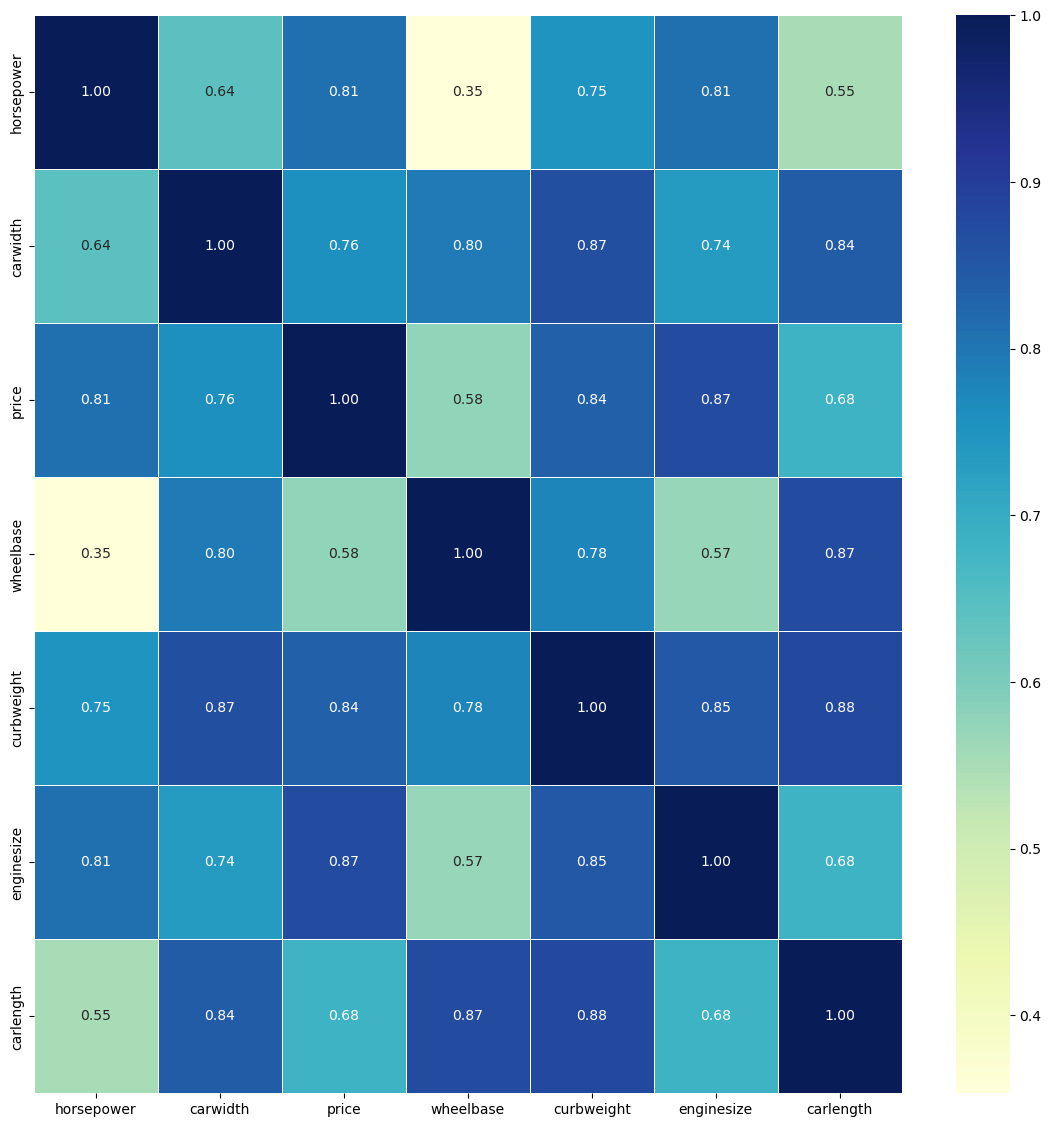

In [33]:
# producing a heatmap for the same thing

plt.figure(figsize=(14,14))
sns.heatmap(corh,annot=True,linewidths=.5, fmt=".2f", cmap="YlGnBu")
plt.show()
# annot is use to add numbered title in each box
# linewidths add white line aroung each box

## Featuring Engineering: Creating dummy Variables for Ordinal Variables

In [34]:
print(1,cars['fueltype'].unique())
print(2,cars['aspiration'].unique())
print(3,cars['drivewheel'].unique())
print(4,cars['enginetype'].unique())
print(5,cars['cylindernumber'].unique())
print(6,cars['fuelsystem'].unique())
print(7,cars['doornumber'].unique())
print(8,cars['enginelocation'].unique())
print(9,cars['CompanyName'].unique())

1 ['gas' 'diesel']
2 ['std' 'turbo']
3 ['rwd' 'fwd' '4wd']
4 ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
5 ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
6 ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
7 ['two' 'four']
8 ['front' 'rear']
9 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porcshce' 'renault' 'saab' 'subaru' 'toyouta' 'volkswagen' 'vw' 'volvo']


In [35]:
# here we can see that 'two' and 'four' is exeist in both cylindernumber and doornumber.
# we will convert two-> dtwo and four -> dfour in doornumber to differensiate those values
cars.doornumber = list(map(lambda x: "d"+x, cars.doornumber))

In [36]:
cars.doornumber

0       dtwo
1       dtwo
2       dtwo
3      dfour
4      dfour
       ...  
200    dfour
201    dfour
202    dfour
203    dfour
204    dfour
Name: doornumber, Length: 205, dtype: object

In [37]:
def dummies(x, df):
    temp = pd.get_dummies(df[x], drop_first=True)
    df = pd.concat([df, temp], axis=1)
    df.drop([x], axis=1, inplace=True)
    return df

cars_f = cars
cars_f = dummies('fueltype', cars_f)
cars_f = dummies('aspiration', cars_f)
cars_f = dummies('carbody', cars_f)
cars_f = dummies('drivewheel', cars_f)
cars_f = dummies('enginetype', cars_f)
cars_f = dummies('cylindernumber', cars_f)
cars_f = dummies('CompanyName', cars_f)
cars_f = dummies('doornumber', cars_f)
cars_f = dummies('enginelocation', cars_f)
cars_f = dummies('fuelsystem', cars_f)

In [38]:
print(cars_f.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  price             205 non-null    float64
 13  fueleconomy       205 non-null    float64
 14  gas               205 non-null    uint8  
 15  turbo             205 non-null    uint8  
 16  hardtop           205 non-null    uint8  
 1

In [39]:
cars_f.shape

(205, 65)

# Train - Test Split and Feature Scaling

In [40]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_f, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
print(df_train)

     symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
122          1       93.7      167.3      63.8       50.8        2191   
125          3       94.5      168.9      68.3       50.2        2778   
166          1       94.5      168.7      64.0       52.6        2300   
1            3       88.6      168.8      64.1       48.8        2548   
199         -1      104.3      188.8      67.2       57.5        3157   
..         ...        ...        ...       ...        ...         ...   
87           1       96.3      172.4      65.4       51.6        2403   
103          0      100.4      184.6      66.5       55.1        3060   
67          -1      110.0      190.9      70.3       56.5        3515   
24           1       93.7      157.3      63.8       50.6        1967   
8            1      105.8      192.7      71.4       55.9        3086   

     enginesize  boreratio  stroke  compressionratio  ...  vw  dtwo  rear  \
122          98       2.97    3.23            

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         143 non-null    int64  
 1   wheelbase         143 non-null    float64
 2   carlength         143 non-null    float64
 3   carwidth          143 non-null    float64
 4   carheight         143 non-null    float64
 5   curbweight        143 non-null    int64  
 6   enginesize        143 non-null    int64  
 7   boreratio         143 non-null    float64
 8   stroke            143 non-null    float64
 9   compressionratio  143 non-null    float64
 10  horsepower        143 non-null    int64  
 11  peakrpm           143 non-null    int64  
 12  price             143 non-null    float64
 13  fueleconomy       143 non-null    float64
 14  gas               143 non-null    uint8  
 15  turbo             143 non-null    uint8  
 16  hardtop           143 non-null    uint8  
 1

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'fueleconomy']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [44]:
df_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,vw,dtwo,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,1,0,0,0,0,0,1,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,1,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,1,0,0,0,0,0,1,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.6,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,0.03125,...,0,0,0,0,0,0,0,0,1,0
103,0.4,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,0.12500,...,0,0,0,0,0,0,0,1,0,0
67,0.2,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,0.90625,...,0,0,0,0,0,1,0,0,0,0
24,0.6,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,0.15000,...,0,0,0,1,0,0,0,0,0,0


In [45]:
df_train.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,vw,dtwo,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,...,0.013986,0.440559,0.006993,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,...,0.117845,0.498199,0.083624,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


In [46]:
# Dividing Train data into X and Y

y_train = df_train.pop('price')
x_train = df_train

In [47]:
y_train, x_train

(122     7609.0
 125    22018.0
 166     9538.0
 1      16500.0
 199    18950.0
         ...   
 87      9279.0
 103    13499.0
 67     25552.0
 24      6229.0
 8      23875.0
 Name: price, Length: 143, dtype: float64,
      symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
 122        0.6   0.244828   0.426016  0.291667   0.265487    0.272692   
 125        1.0   0.272414   0.452033  0.666667   0.212389    0.500388   
 166        0.6   0.272414   0.448780  0.308333   0.424779    0.314973   
 1          1.0   0.068966   0.450407  0.316667   0.088496    0.411171   
 199        0.2   0.610345   0.775610  0.575000   0.858407    0.647401   
 ..         ...        ...        ...       ...        ...         ...   
 87         0.6   0.334483   0.508943  0.425000   0.336283    0.354926   
 103        0.4   0.475862   0.707317  0.516667   0.646018    0.609775   
 67         0.2   0.806897   0.809756  0.833333   0.769912    0.786268   
 24         0.6   0.244828   0.263415  0.

# Model Building

In [48]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [49]:
def built_model(X,y):
    
    # Adding the constants
    X = sm.add_constant(X)
    # This will add a constant feature in X dataframe with all value fill with 1.
    # This helps to calculate bias parameter(theta-0).

    # Fitting the model, using OLS algorithm.
    lm = sm.OLS(y,X).fit()
    # Model name is 'lm'
    # fit is used to built model using x and y. if fit method is not use thrn only Model Object is created using OLS().
    
    # prins model summary
    print(lm.summary())
          
    return lm

### creating first model and clean up features with colinearity.

In [50]:
model1 = built_model(x_train, y_train) # lm.summary() is printing the summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.38
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.63e-49
Time:                        16:12:34   Log-Likelihood:                -1221.3
No. Observations:                 143   AIC:                             2559.
Df Residuals:                      85   BIC:                             2730.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1649.2416   5753.874  

In [51]:
x_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'fueleconomy', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porcshce', 'renault', 'saab', 'subaru', 'toyouta',
       'volkswagen', 'volvo', 'vw', 'dtwo', 'rear', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [52]:
# predicion price for train data

# model4 = built_model(x_train,y_train)
x_train = sm.add_constant(x_train)
y_train_price = model1.predict(x_train)

Text(0.5, 0, 'Error')

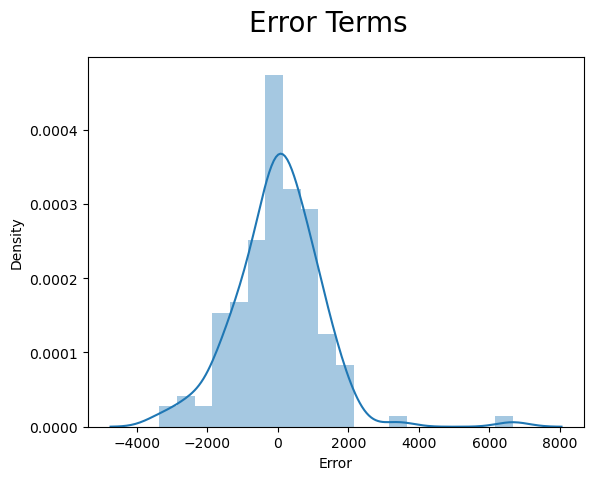

In [53]:
# plotting the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Error", fontsize=10)

### Observations:
1. Error Terms seems to be approximately normal distributed, so the assumption on the linear regression seems to be fullfilled

# Predisting and Evaluating using Test data

In [54]:
# dividing into x and y

y_test = df_test.pop("price")
x_test = df_test[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'fueleconomy', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'audi', 'bmw', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyouta', 'volkswagen', 'volvo', 'vw', 'dtwo', 'rear',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']]

In [55]:
x_train.columns

Index(['const', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'fueleconomy', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porcshce', 'renault', 'saab', 'subaru', 'toyouta',
       'volkswagen', 'volvo', 'vw', 'dtwo', 'rear', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [56]:
y_test, x_test

(160     7738.0
 186     8495.0
 59      8845.0
 165     9298.0
 140     7603.0
         ...   
 28      8921.0
 29     12964.0
 182     7775.0
 40     10295.0
 128    37028.0
 Name: price, Length: 62, dtype: float64,
      symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
 160        0.4   0.265306   0.341732  0.200000   0.346154    0.132148   
 186        0.8   0.311953   0.426772  0.315789   0.605769    0.219125   
 59         0.6   0.355685   0.522835  0.421053   0.413462    0.271985   
 165        0.6   0.230321   0.379528  0.157895   0.307692    0.214320   
 140        0.8   0.195335   0.200000  0.136842   0.605769    0.202307   
 ..         ...        ...        ...       ...        ...         ...   
 28         0.2   0.486880   0.472441  0.221053   1.000000    0.344065   
 29         1.0   0.271137   0.450394  0.400000   0.076923    0.476694   
 182        0.8   0.311953   0.426772  0.315789   0.605769    0.212398   
 40         0.4   0.288630   0.485039  0.0

In [57]:
# adding constant

x_test_new = pd.DataFrame(sm.add_constant(x_test))

In [58]:
x_test_new

,const,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,vw,dtwo,rear,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
160,1.0,0.4,0.265306,0.341732,0.200000,0.346154,0.132148,0.082969,0.515873,0.524590,...,0,0,0,1,0,0,0,0,0,0
186,1.0,0.8,0.311953,0.426772,0.315789,0.605769,0.219125,0.131004,0.515873,0.726776,...,0,0,0,0,0,0,0,1,0,0
59,1.0,0.6,0.355685,0.522835,0.421053,0.413462,0.271985,0.187773,0.674603,0.721311,...,0,1,0,1,0,0,0,0,0,0
165,1.0,0.6,0.230321,0.379528,0.157895,0.307692,0.214320,0.082969,0.555556,0.551913,...,0,1,0,0,0,0,0,1,0,0
140,1.0,0.8,0.195335,0.200000,0.136842,0.605769,0.202307,0.126638,0.857143,0.311475,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1.0,0.2,0.486880,0.472441,0.221053,1.000000,0.344065,0.187773,0.634921,0.759563,...,0,0,0,1,0,0,0,0,0,0
29,1.0,1.0,0.271137,0.450394,0.400000,0.076923,0.476694,0.336245,0.841270,1.000000,...,0,1,0,0,0,0,1,0,0,0
182,1.0,0.8,0.311953,0.426772,0.315789,0.605769,0.212398,0.078603,0.373016,0.726776,...,0,1,0,0,0,1,0,0,0,0
40,1.0,0.4,0.288630,0.485039,0.000000,0.451923,0.265738,0.135371,0.484127,0.825137,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# now lets use our model ro make prediction
y_pred = model1.predict(x_test_new)

# Model Performance Comparison between train and test(Generalisation)

In [60]:
from sklearn.metrics import r2_score
print("Test Peresiction R-Squr:", r2_score(y_test, y_pred))

Test Peresiction R-Squr: 0.07897721864835405


In [61]:
print("Train Peresiction R-Squr:", r2_score(y_train, y_train_price))

Train Peresiction R-Squr: 0.9746714155737769


### Observation:
1. R-squared value of Training data is almost 80% and 98% for test data.

### Residual Normality

Text(0.5, 0, 'Errors')

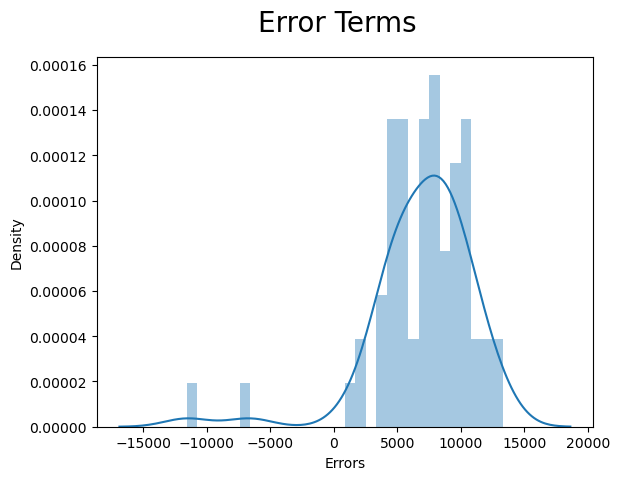

In [62]:
# plot thr histogram of the error term

fig = plt.figure()
sns.distplot(y_test-y_pred, bins=30)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=10)

Text(0, 0.5, 'y_pred')

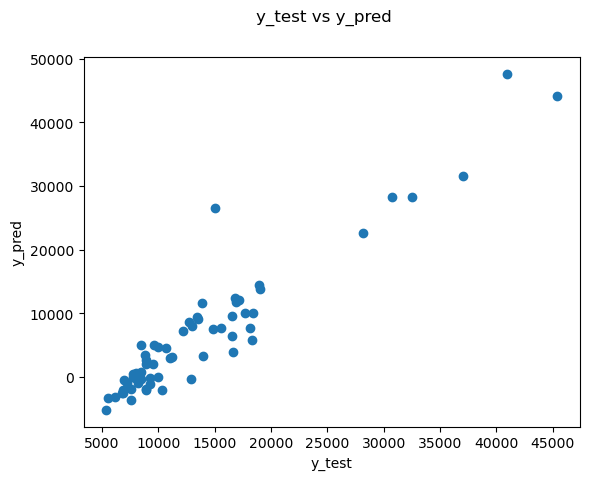

In [63]:
# evaliuation of the model
# ploting y_test against y_pred tp underdtand thr spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")

# Final Model

In [64]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.38
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           1.63e-49
Time:                        16:12:36   Log-Likelihood:                -1221.3
No. Observations:                 143   AIC:                             2559.
Df Residuals:                      85   BIC:                             2730.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1649.2416   5753.874  